In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import mlflow
from sklearn.model_selection import GridSearchCV

In [64]:
dataset=load_breast_cancer()

In [65]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [66]:
X=dataset.data
X=pd.DataFrame(X,columns=dataset.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
y=dataset.target
y=pd.DataFrame(y,columns=["target"])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [96]:
from mlflow.models import infer_signature


In [70]:
parameters={
            'n_estimators':[100,150,200,250],
            'criterion':('gini', 'entropy', 'log_loss'),
            'max_features':('sqrt','log2'),
            'class_weight':('balanced','balanced_subsample')
            }

In [71]:
clf=RandomForestClassifier()

In [72]:
best_clf=GridSearchCV(clf,parameters)

In [73]:
best_clf.fit(X_train,y_train)

d:\100devMl\mlflow\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\100devMl\mlflow\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\100devMl\mlflow\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\100devMl\mlflow\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ('balanced', 'balanced_subsample'),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': [100, 150, 200, 250]})

In [74]:
best_params=best_clf.best_params_
best_params

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 250}

In [112]:
best_clf_model=RandomForestClassifier(class_weight='balanced',criterion='log_loss',max_features='log2',n_estimators=250)

In [113]:
best_clf_model.fit(X_train,y_train)

d:\100devMl\mlflow\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2', n_estimators=250)

In [114]:
y_pred=best_clf_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [115]:
from sklearn.metrics import classification_report

In [116]:
report=classification_report(y_true=y_test,y_pred=y_pred,target_names=dataset.target_names,output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
malignant,0.951220,0.928571,0.939759,42.00000
benign,0.958904,0.972222,0.965517,72.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.955062,0.950397,0.952638,114.00000
weighted avg,0.956073,0.956140,0.956027,114.00000


In [117]:
from sklearn import metrics
import matplotlib.pyplot as plt

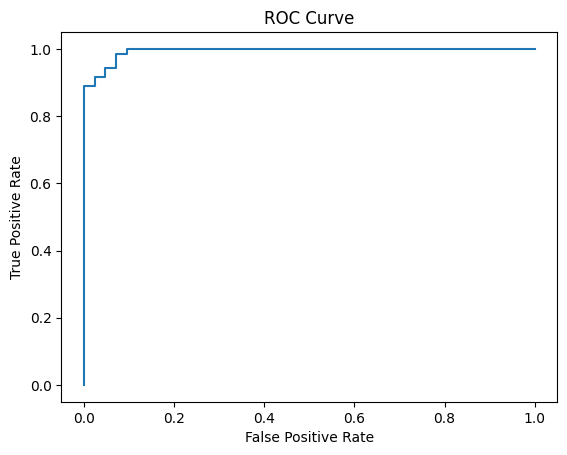

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_clf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy=accuracy_score(y_pred=y_pred,y_true=y_test)
accuracy

0.956140350877193

### Mlflow Tasks

### Mlflow Tracking(parameters,metrics,model) Locally

In [121]:
mlflow.set_tracking_uri("http://127.0.0.1:5000") #To check localhost uri run "mlflow ui" in terminal

In [122]:
mlflow.set_experiment(experiment_name="Breast_cancer_metrics")

<Experiment: artifact_location='mlflow-artifacts:/253538583579456269', creation_time=1734498970448, experiment_id='253538583579456269', last_update_time=1734498970448, lifecycle_stage='active', name='Breast_cancer_metrics', tags={}>

In [123]:
with mlflow.start_run():

    mlflow.log_params(best_params) #logging best parameters

    mlflow.log_metric("accuracy",accuracy) # Logging single metric

    for class_or_avg, metrics_dict in report.items():# Logging dictionary(classification report)
        if isinstance(metrics_dict, dict):  
            for metric, value in metrics_dict.items():
                mlflow.log_metric(f"{class_or_avg}_{metric}", value)
        else: 
            mlflow.log_metric(class_or_avg, metrics_dict)

    mlflow.log_param("classification_report", report)

    signature=infer_signature(X_train,best_clf_model.predict(X_train))

    model_info=mlflow.sklearn.log_model(
        sk_model=best_clf_model,
        artifact_path="Breast_cancer",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )

    
    

Registered model 'tracking-quickstart' already exists. Creating a new version of this model...
2024/12/18 11:55:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 3
Created version '3' of model 'tracking-quickstart'.


In [124]:
model_info.model_uri

'runs:/e37805ab4a9f41a690b83f0390e8d59d/Breast_cancer'

### Infrencing and Validating Model

In [125]:

import mlflow
logged_model = 'runs:/e37805ab4a9f41a690b83f0390e8d59d/Breast_cancer'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [128]:
X_test['result']=y_pred
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,36.27,178.60,1926.0,0.1281,0.53290,0.4251,0.19410,0.2818,0.10050,0
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083,1
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830,0
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,25.45,117.20,1009.0,0.1338,0.16790,0.1663,0.09123,0.2394,0.06469,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115,0


### Model Registry